<a href="https://colab.research.google.com/github/watashi-wa-aditya/Neural-Networks-for-MNIST-Dataset/blob/main/Fashion_Dataset%2C_Basics_of_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Notebook deals with the MNIST Fashion dataset which includes various clothing items in reduced pixel form. We develop a simple Neural Network to identify the clothing item by feeding the picture with same pixel form. In this notebook the prediction is done by dividing the dataset into Train and Test dataset. Test dataset is not used at all for training the Neural Networks so, the pictures predicted using Test dataset is completely new to the Neural Networks.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
keras.__version__

'2.5.0'

**Importing MNIST Fashion Dataset**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

=> Image shape: 28 X 28 pixel image, 60000 images

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Providing class names.(The class names are provided with the documentary of dataset)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

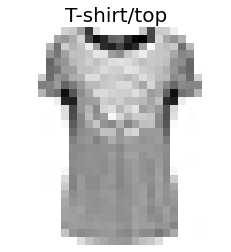

In [ ]:
index= 1
plt.imshow(X_train[index], cmap= "binary")
plt.axis("off")
plt.title(class_names[y_train[index]], fontsize=20)
plt.show()

**Making of Neural Networks**

In [ ]:
model = keras.models.Sequential([
                                  keras.layers.Flatten(input_shape=[28, 28]),
                                  keras.layers.Dense(300, activation="relu"),
                                  keras.layers.Dense(100, activation="relu"),
                                  keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Training of Neural Networks

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7013 - accuracy: 0.7691 - val_loss: 0.5177 - val_accuracy: 0.8202
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4860 - accuracy: 0.8296 - val_loss: 0.4348 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4430 - accuracy: 0.8437 - val_loss: 0.5402 - val_accuracy: 0.7976
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4166 - accuracy: 0.8546 - val_loss: 0.3958 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3981 - accuracy: 0.8613 - val_loss: 0.3795 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3792 - accuracy: 0.8663 - val_loss: 0.3724 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3668 - accuracy: 0.8717 - val_loss: 0.3626 - val_accuracy:

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

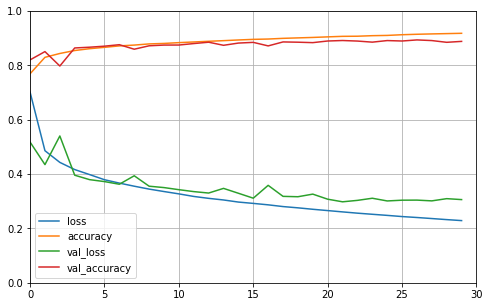

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.axis([0,30,0.0,1.0])
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8786


[0.34014463424682617, 0.878600001335144]

**Predicting value and class**

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

**Showing pictures of predicted class**

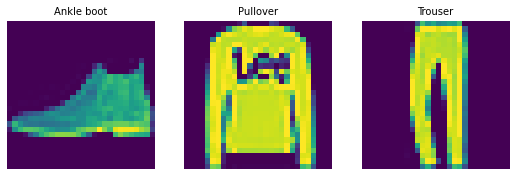

In [ ]:
plt.figure(figsize=(9, 5))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()